In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from textblob import TextBlob

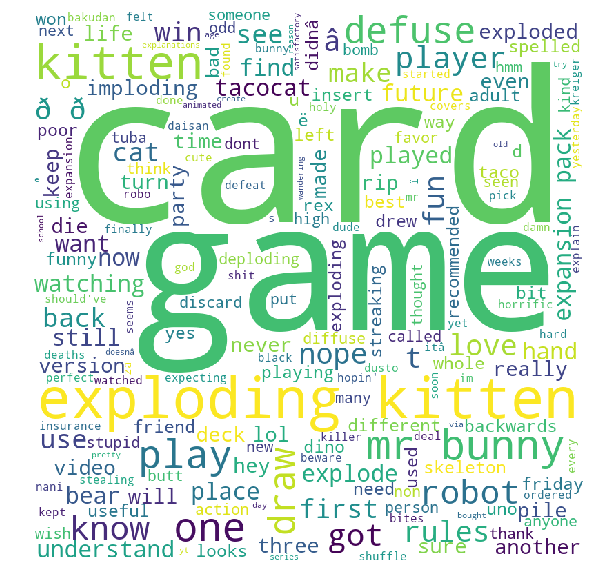

In [2]:
files = [['kittens.csv','ExplodingKittens']]

for file, name in files:
    df = pd.read_csv(file, encoding ="latin_1") 

    comment_words = '' 
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in df.comment: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.savefig(name)
    #plt.show() 

In [3]:
for file, name in files:
    df = pd.read_csv(file, encoding='latin_1')
    df['polarity']=df['comment'].apply(lambda x : TextBlob(x).sentiment.polarity)
    df['subjectivity']=df['comment'].apply(lambda x : TextBlob(x).sentiment.subjectivity)
    
    df_neg = df[df['polarity']<=-0.33]
    df_neg.to_csv(name+'negative.csv', index=False)
    df_pos = df[df['polarity']>=0.33]
    df_pos.to_csv(name+'positive.csv', index=False)